Generated Graph:
Vertex Cover Set: {0, 1, 2, 3}
Independent Set: {4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103}
Thresholds: {0: 3, 1: 2, 2: 2, 3: 1, 4: 1, 5: 3, 6: 2, 7: 1, 8: 0, 9: 0, 10: 2, 11: 0, 12: 0, 13: 1, 14: 4, 15: 0, 16: 2, 17: 1, 18: 0, 19: 0, 20: 1, 21: 1, 22: 2, 23: 1, 24: 0, 25: 1, 26: 0, 27: 0, 28: 1, 29: 1, 30: 0, 31: 2, 32: 2, 33: 0, 34: 0, 35: 2, 36: 1, 37: 0, 38: 2, 39: 3, 40: 0, 41: 2, 42: 2, 43: 2, 44: 2, 45: 0, 46: 2, 47: 2, 48: 1, 49: 1, 50: 3, 51: 1, 52: 2, 53: 3, 54: 1, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 2, 61: 2, 62: 0, 63: 0, 64: 1, 65: 0, 66: 0, 67: 2, 68: 0, 69: 0, 70: 1, 71: 0, 72: 0, 73: 1, 74: 2, 75: 2, 7

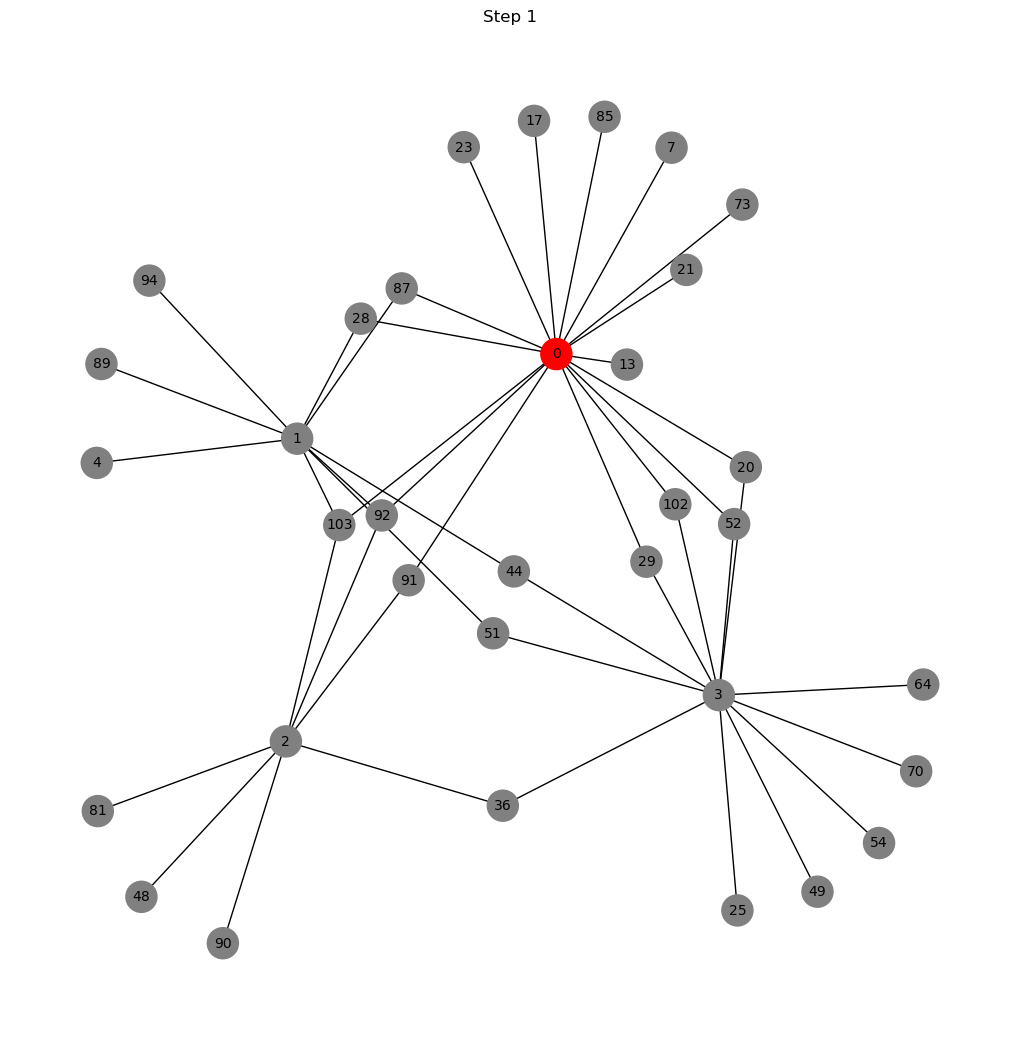

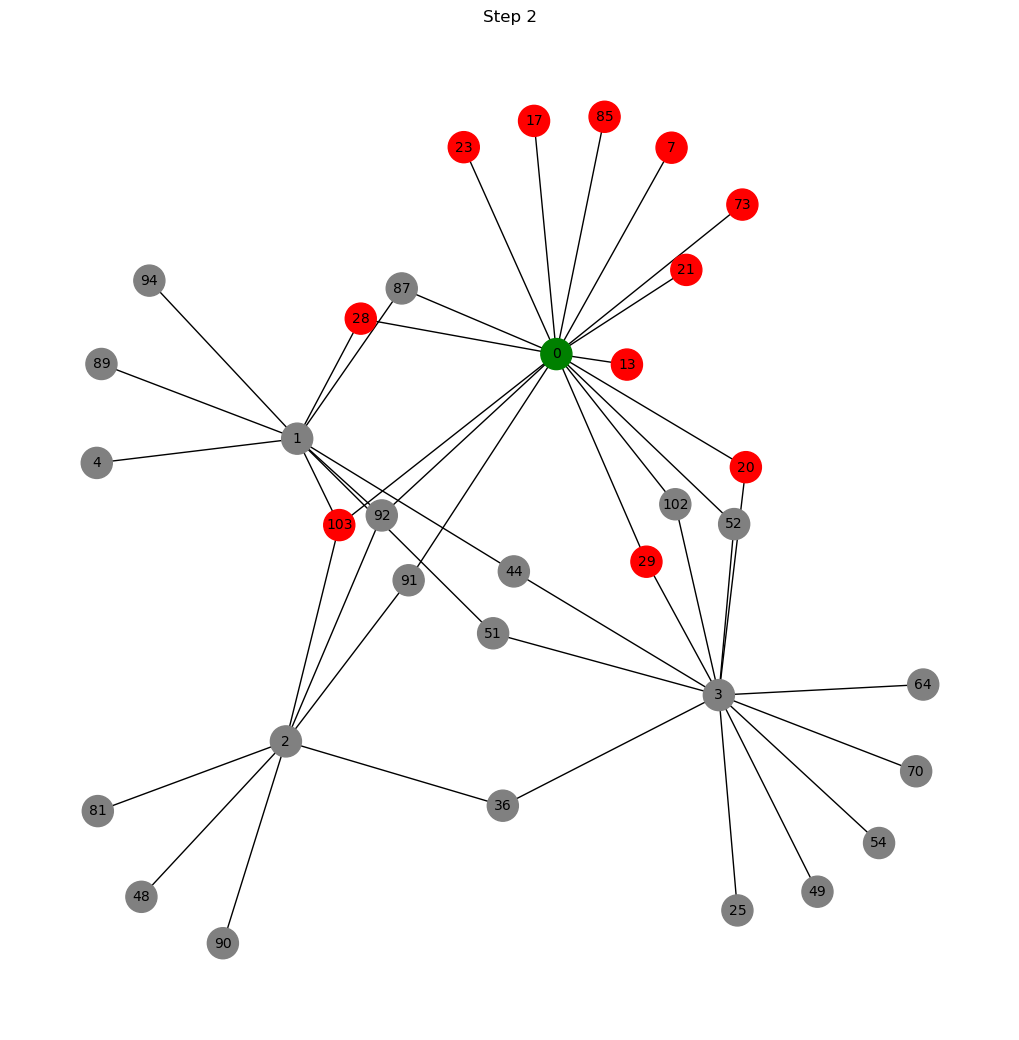

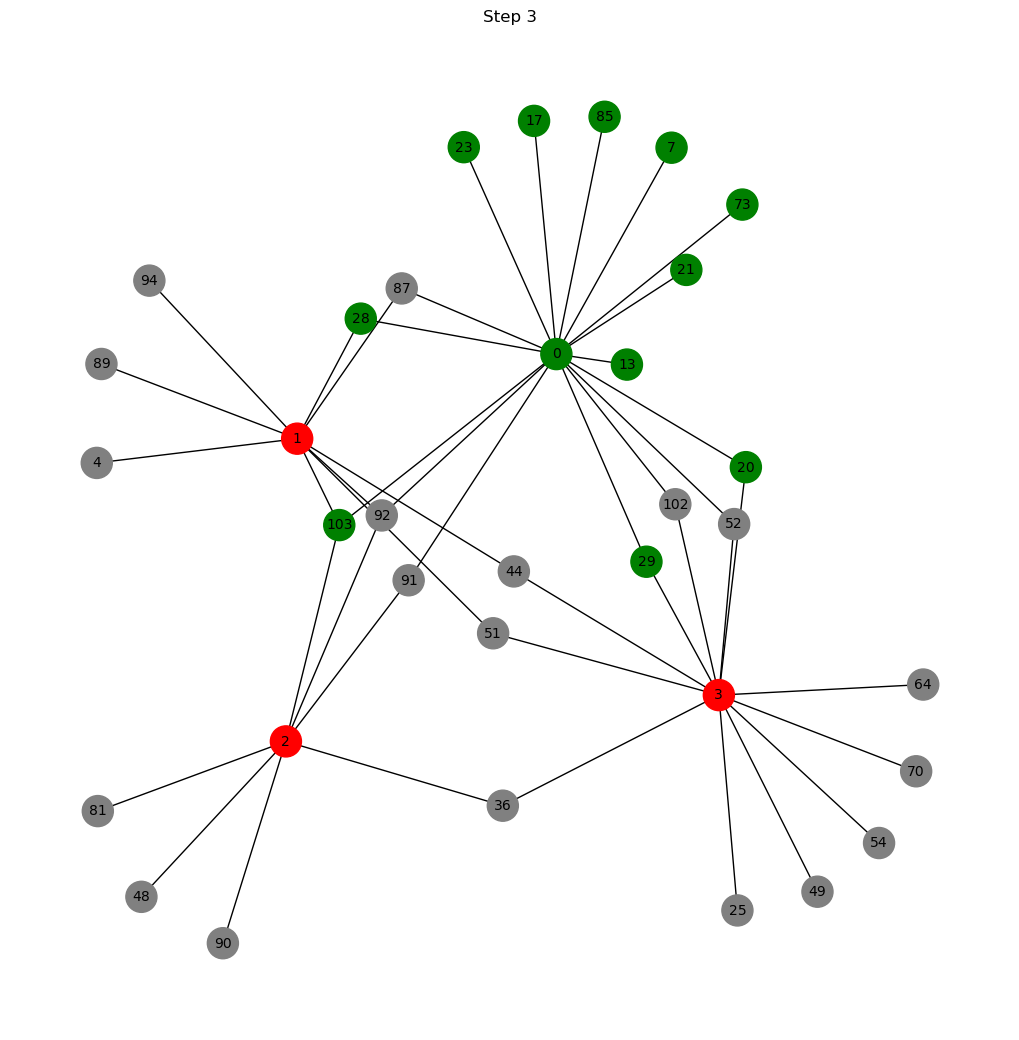

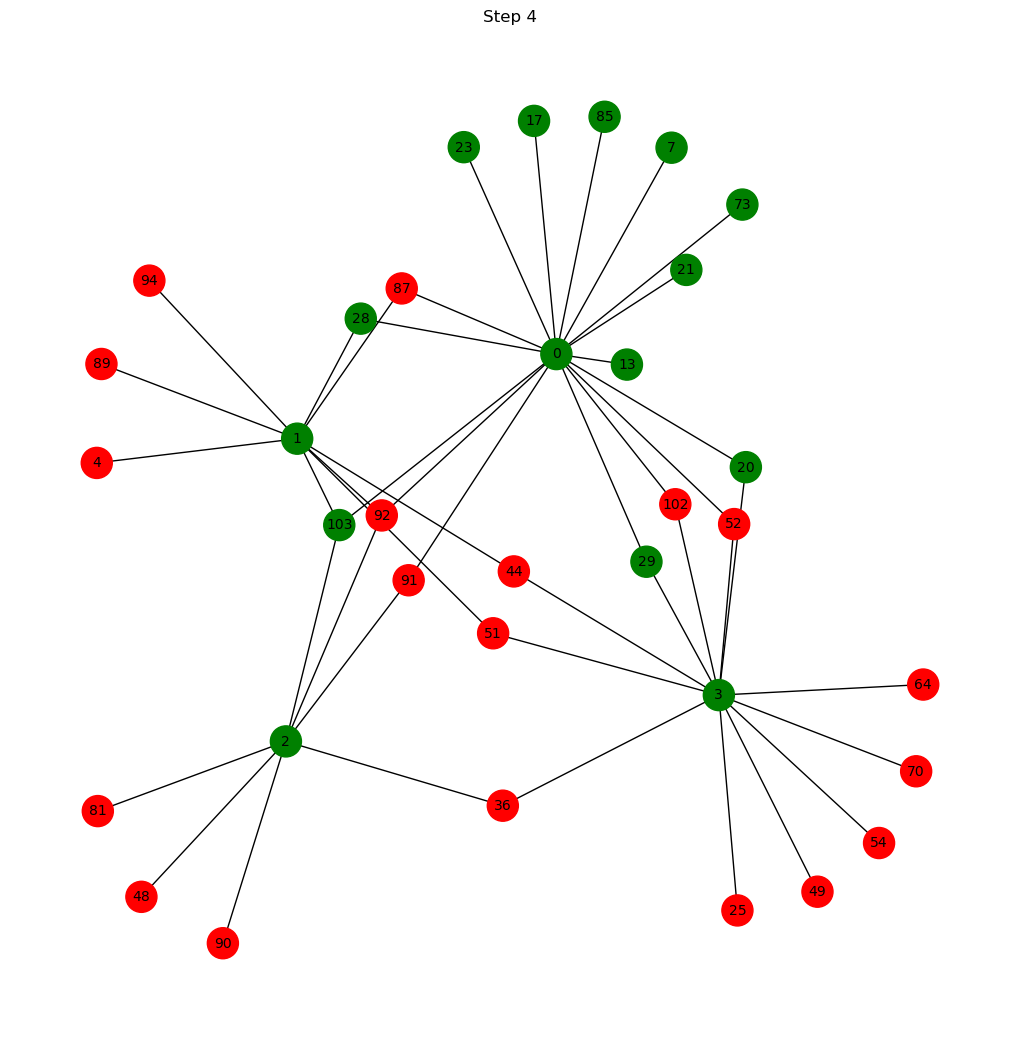

Total runtime: 2.35 seconds


In [4]:
"""
This code is written in a Jupyter Notebook Python environment. 
To ensure successful execution, please try to use a similar environment configuration. 
Running this code will generate the Vertex Cover Set, Independent Set, 
Thresholds for each node, edges included in the graph, remaining nodes and their thresholds 
after applying the reduction rules, the partition of the Independent Set, 
the constructed set C, and the minimal target set. 
Additionally, it will visualize the process of activating the entire graph.
"""
import networkx as nx
import random
import matplotlib.pyplot as plt
import itertools
import time

class TargetSetSelection:
    """
    Adjust the number of nodes in the independent set by changing the value of num_nodes, 
    and control the number of nodes in the vertex cover set by changing the value of tau. 
    For example, num_nodes=104 and tau=4 means that the independent set contains 100 nodes 
    and the vertex cover set contains 4 nodes. 
    Since this is a preliminary algorithm with limited efficiency, it is recommended 
    not to set num_nodes and tau too high, as this may result in long execution times.
    """
    def __init__(self, num_nodes=104, tau=4):
        """
        Initialize the TargetSetSelection class, generating a graph, reducing the graph,
        partitioning the independent set, building set C, and finding the minimal target set.
        
        Parameters:
        - num_nodes: Number of nodes in the graph
        - tau: Size of the vertex cover set
        """
        self.num_nodes = num_nodes
        self.tau = tau
        self.G = nx.Graph()  # Create an empty graph
        self.vertex_cover_set = set()  # Store the vertex cover set
        self.independent_set = set()  # Store the independent set
        self.thresholds = {}  # Store activation thresholds for each node
        
        start_time = time.time()
        self._generate_graph()  # Generate a random graph
        self._reduce_graph()  # Reduce the graph structure
        self.subsets = self._partition_independent_set()  # Partition the independent set
        self.C = self._build_set_C()  # Build set C from the vertex cover and independent sets
        self.target_set = self._find_minimal_target_set()  # Find the minimal target set
        self._verify_and_visualize_activation()  # Verify and visualize the activation process
        end_time = time.time()
        print(f"Total runtime: {end_time - start_time:.2f} seconds")

    def _generate_graph(self):
        """
        Generate a random bipartite-like graph with a vertex cover set and an independent set.
        The independent set nodes have random connections to the vertex cover set nodes, 
        ensuring each independent node has at least one connection.
        """
        self.G.add_nodes_from(range(self.num_nodes))
        for i in range(self.tau):
            self.vertex_cover_set.add(i)
        for i in range(self.tau, self.num_nodes):
            self.independent_set.add(i)

        # Increase connection probability and ensure each independent set node 
        # is connected to at least one vertex cover set node
        for v in self.independent_set:
            connected = False
            for u in self.vertex_cover_set:
                if random.random() < 0.2:  # Increase connection probability
                    self.G.add_edge(u, v)
                    connected = True
           
        # Assign random thresholds to each node based on its degree
        self.thresholds = {v: random.randint(1, self.G.degree[v] + 1) if self.G.degree[v] > 0 else 0 for v in self.G.nodes()}

        print("Generated Graph:")
        print("Vertex Cover Set:", self.vertex_cover_set)
        print("Independent Set:", self.independent_set)
        print("Thresholds:", self.thresholds)
        print("Edges:", list(self.G.edges))

    def _reduce_graph(self):
        """
        Reduce the graph by removing nodes with thresholds that are either zero 
        (no activation required) or greater than their degree (impossible to activate).
        Update thresholds for neighboring nodes after removal.
        """
        to_remove = set()
        for node in list(self.G.nodes()):
            if self.thresholds[node] == 0:
                to_remove.add(node)
            elif self.thresholds[node] > self.G.degree[node]:
                to_remove.add(node)
        
        # Remove the identified nodes and adjust the thresholds of their neighbors
        for node in to_remove:
            neighbors = list(self.G.neighbors(node))
            self.G.remove_node(node)
            for neighbor in neighbors:
                if neighbor in self.thresholds:
                    self.thresholds[neighbor] -= 1
                    if self.thresholds[neighbor] <= 0:
                        self.thresholds[neighbor] = 1  # Ensure the threshold is greater than 0
            if node in self.vertex_cover_set:
                self.vertex_cover_set.remove(node)
            if node in self.independent_set:
                self.independent_set.remove(node)

        print("Reduced Graph:")
        print("Remaining Nodes:", list(self.G.nodes()))
        print("Thresholds after Reduction:", self.thresholds)

    def _partition_independent_set(self):
        """
        Partition the independent set into subsets where each subset shares 
        the same neighbors in the vertex cover set. This is to optimize the target set selection process.
        """
        subsets = []
        neighbor_dict = {}
        for node in self.independent_set:
            neighbors = frozenset(self.G.neighbors(node))
            if neighbors not in neighbor_dict:
                neighbor_dict[neighbors] = []
            neighbor_dict[neighbors].append(node)
        
        # Create partitions based on shared neighbors
        for nodes in neighbor_dict.values():
            subsets.append(set(nodes))
        
        print("Partitions of Independent Set:", subsets)
        return subsets

    def _build_set_C(self):
        """
        Build set C by including all nodes in the vertex cover set and selecting the top tau nodes 
        from each subset in the independent set based on their thresholds.
        """
        C = set(self.vertex_cover_set)
        for subset in self.subsets:
            sorted_subset = sorted(subset, key=lambda x: self.thresholds[x], reverse=True)
            for i in range(min(len(sorted_subset), self.tau)):
                C.add(sorted_subset[i])
        print("Set C:", C)
        return C

    def _find_minimal_target_set(self):
        """
        Find the minimal target set from set C that can activate the entire graph.
        This is done by checking all combinations of nodes in C of size 1 to tau.
        """
        minimal_target_set = None
        for subset_size in range(1, self.tau + 1):
            for subset in itertools.combinations(self.C, subset_size):
                if self._is_target_set(subset):
                    if minimal_target_set is None or len(subset) < len(minimal_target_set):
                        minimal_target_set = subset
        print("Minimal Target Set:", minimal_target_set)
        return minimal_target_set

    def _is_target_set(self, subset):
        """
        Check if a given subset of nodes can activate the entire graph. 
        This is done by simulating the activation process and seeing if all nodes become active.
        """
        active_set = set(subset)
        newly_active = set(subset)
        while newly_active:
            next_newly_active = set()
            for node in list(self.G.nodes()):
                if node not in active_set:
                    active_neighbors = len([neighbor for neighbor in self.G.neighbors(node) if neighbor in active_set])
                    if active_neighbors >= self.thresholds[node]:
                        next_newly_active.add(node)
            if not next_newly_active:
                break
            active_set.update(next_newly_active)
            newly_active = next_newly_active
        return len(active_set) == len(self.G.nodes())

    def _verify_and_visualize_activation(self):
        """
        Verify the activation process starting from the minimal target set and 
        visualize the activation of nodes over each step.
        """
        if self.target_set is None:
            print("No target set found")
            return
        
        active_set = set(self.target_set)
        newly_active = set(self.target_set)
        steps = []

        step_num = 1
        while newly_active:
            print(f"Step {step_num} activated nodes: {newly_active}")
            steps.append(set(newly_active))
            next_newly_active = set()
            for node in list(self.G.nodes()):
                if node not in active_set:
                    active_neighbors = len([neighbor for neighbor in self.G.neighbors(node) if neighbor in active_set])
                    if active_neighbors >= self.thresholds[node]:
                        next_newly_active.add(node)
            if not next_newly_active:
                break
            active_set.update(next_newly_active)
            newly_active = next_newly_active
            step_num += 1

        self._visualize_activation(steps, active_set)

    def _visualize_activation(self, steps, active_set):
        """
        Visualize the activation process using a series of plots, 
        showing the progression of node activation at each step.
        """
        pos = nx.spring_layout(self.G)
        all_active_set = set()
        for step_num, step in enumerate(steps):
            all_active_set.update(step)
            plt.figure(figsize=(10, 10))
            node_colors = []
            for node in self.G.nodes():
                if node in all_active_set and node not in step:
                    node_colors.append('green')
                elif node in step:
                    node_colors.append('red')
                else:
                    node_colors.append('gray')
            nx.draw(self.G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10)
            plt.title(f'Step {step_num + 1}')
            plt.show()

# Create and run an instance of TargetSetSelection
tss = TargetSetSelection()
